### DSCI550 Project - Decision Tree 
#### Maria G Barrera Valdez, Chrystalla Havadjia, Dara Hashemi

In [37]:
#Read the file
import pandas as pd
df = pd.read_csv('/Users/barrerav/Downloads/in-vehicle-coupon-recommendation.csv')

df_coupons = df.copy() #create copy of the original dataframe

In [7]:
#Remove instances where the coupon type is not Restaurant(<20)
df_coupons.drop(df_coupons[df_coupons['coupon'] != 'Restaurant(<20)'].index, inplace = True)

print(df_coupons.head(5)) #view first 5 rows of data

#Rename target variable 'Y' to 'Coupon'
df_coupons.rename(columns={'Y': 'Coupon', 'coupon': 'coupon_type'}, inplace=True)

        destination  passanger weather  temperature  time           coupon  \
0   No Urgent Place      Alone   Sunny           55   2PM  Restaurant(<20)   
5   No Urgent Place  Friend(s)   Sunny           80   6PM  Restaurant(<20)   
7   No Urgent Place     Kid(s)   Sunny           80  10AM  Restaurant(<20)   
10  No Urgent Place     Kid(s)   Sunny           80   2PM  Restaurant(<20)   
11  No Urgent Place     Kid(s)   Sunny           55   2PM  Restaurant(<20)   

   expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
0          1d  Female  21  Unmarried partner  ...        never       NaN   
5          2h  Female  21  Unmarried partner  ...        never       NaN   
7          2h  Female  21  Unmarried partner  ...        never       NaN   
10         1d  Female  21  Unmarried partner  ...        never       NaN   
11         1d  Female  21  Unmarried partner  ...        never       NaN   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15mi

In [8]:
#Identify features with NULL values
df_coupons.isnull().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon_type                0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     2761
Bar                       23
CoffeeHouse               47
CarryAway                 34
RestaurantLessThan20      27
Restaurant20To50          43
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
Coupon                     0
dtype: int64

In [9]:
#Delete irrelevant columns
del df_coupons['car'] #most values are null
del df_coupons['coupon_type'] #only use one coupon type for this project
del df_coupons['toCoupon_GEQ5min'] #has only 1 value for each instance

In [10]:
#Impute NULL values with the mode
df_vcoupons = df_coupons.fillna(df_coupons['CoffeeHouse'].value_counts().index[0])
df_vcoupons = df_coupons.fillna(df_coupons['CarryAway'].value_counts().index[0])
df_vcoupons = df_coupons.fillna(df_coupons['RestaurantLessThan20'].value_counts().index[0])
df_vcoupons = df_coupons.fillna(df_coupons['Restaurant20To50'].value_counts().index[0])

Text(0.5, 1.0, 'Times a month going to a restaurant where $20/person on avrg.')

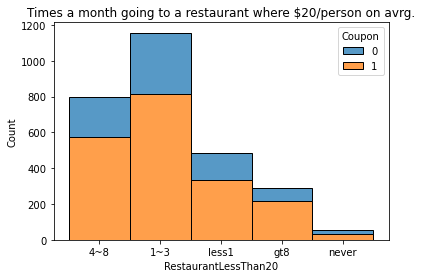

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="RestaurantLessThan20", hue="Coupon", data=df_vcoupons, stat="count", multiple="stack")
plt.title('Times a month going to a restaurant where $20/person on avrg.')

Text(0.5, 1.0, 'Destination')

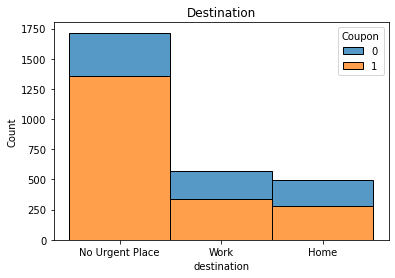

In [18]:
sns.histplot(binwidth=0.5, x="destination", hue="Coupon", data=df_vcoupons, stat="count", multiple="stack")
plt.title('Destination')

Text(0.5, 1.0, 'Weather')

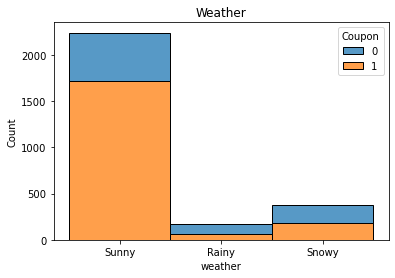

In [19]:
sns.histplot(binwidth=0.5, x="weather", hue="Coupon", data=df_vcoupons, stat="count", multiple="stack")
plt.title('Weather')

Text(0.5, 1.0, 'Driving distance to restaurant > 25min. to use the coupon')

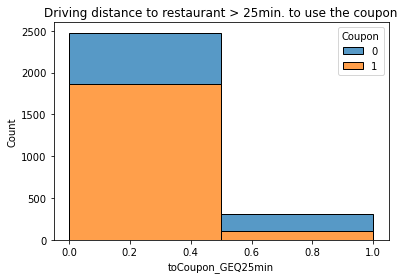

In [21]:
sns.histplot(binwidth=0.5, x="toCoupon_GEQ25min", hue="Coupon", data=df_vcoupons, stat="count", multiple="stack")
plt.title('Driving distance to restaurant > 25min. to use the coupon')

In [22]:
#Coverting categorical variables to numerical variables for analysis 
mapping = {'No Urgent Place': 0, 'Work': 1, 'Home':2}
df_vcoupons=df_vcoupons.replace({'destination': mapping})

mapping = {'Alone': 0, 'Friend(s)': 1, 'Kid(s)':2, 'Partner':3}
df_vcoupons=df_vcoupons.replace({'passanger': mapping})

mapping = {'Sunny': 0, 'Snowy': 1, 'Rainy':2}
df_vcoupons=df_vcoupons.replace({'weather': mapping})

mapping = {'6PM': 18, '2PM': 14, '7AM':7 , '10PM': 22, '10AM' : 10}
df_vcoupons=df_vcoupons.replace({'time': mapping})

mapping = {'1d': 24 , '2h':2}
df_vcoupons=df_vcoupons.replace({'expiration': mapping})

mapping = {'Female':0,'Male':1}
df_vcoupons=df_vcoupons.replace({'gender': mapping})

mapping = {'50plus':50, 'below21':20}
df_vcoupons=df_vcoupons.replace({'age': mapping})

mapping = {'Unmarried partner': 1, 'Single': 0, 'Married partner':4, 'Divorced':3, 'Widowed':2}
df_vcoupons=df_vcoupons.replace({'maritalStatus': mapping})

mapping = {'Some college - no degree': 2, 'Some High School': 0, 'Bachelors degree':4
          , 'Associates degree':3, 'High School Graduate':1, 'Graduate degree (Masters or Doctorate)':5}
df_vcoupons=df_vcoupons.replace({'education': mapping})

mapping = {'Unemployed': 0, 'Student': 1, 'Retired':3
          ,'Architecture & Engineering':4, 'Education&Training&Library':4, 'Healthcare Support':4
          ,'Healthcare Practitioners & Technical':4, 'Sales & Related':4, 'Management':4
          ,'Arts Design Entertainment Sports & Media':4, 'Computer & Mathematical':4, 'Life Physical Social Science':4
          ,'Personal Care & Service':4, 'Community & Social Services':4, 'Office & Administrative Support':4
          ,'Construction & Extraction':4, 'Legal':4, 'Installation Maintenance & Repair':4, 'Transportation & Material Moving':4
          ,'Business & Financial':4, 'Protective Service':4, 'Food Preparation & Serving Related':4, 'Production Occupations':4
          ,'Building & Grounds Cleaning & Maintenance':4, 'Farming Fishing & Forestry':4}
df_vcoupons=df_vcoupons.replace({'occupation': mapping})

mapping = {'$37500 - $49999': 3,'$62500 - $74999': 5, '$12500 - $24999':1, '$75000 - $87499':6
           ,'$50000 - $62499':4, '$25000 - $37499':2, '$100000 or More':8, '$87500 - $99999':7, 'Less than $12500':0}
df_vcoupons=df_vcoupons.replace({'income': mapping})

mapping = {'never':0,'less1':1,'1~3':3,'4~8':8, 'gt8':9}

df_vcoupons=df_vcoupons.replace({'Bar':mapping, 'CarryAway':mapping, 'CoffeeHouse':mapping
                                 , 'Restaurant20To50':mapping,'RestaurantLessThan20':mapping})

In [23]:
#compute the correlation matrix
cor = df_vcoupons.corr()
print(cor)

                      destination  passanger   weather  temperature      time  \
destination              1.000000  -0.345911  0.132441    -0.165706  0.106977   
passanger               -0.345911   1.000000 -0.108934     0.013358  0.243591   
weather                  0.132441  -0.108934  1.000000    -0.518869 -0.312228   
temperature             -0.165706   0.013358 -0.518869     1.000000  0.145992   
time                     0.106977   0.243591 -0.312228     0.145992  1.000000   
expiration              -0.115212   0.023033 -0.207926    -0.054567 -0.179742   
gender                   0.001155  -0.030250  0.049022    -0.026477 -0.040516   
maritalStatus           -0.047303   0.196713 -0.038621    -0.001694  0.038146   
has_children            -0.084340   0.025851 -0.067176     0.042453 -0.051205   
education               -0.001338   0.025453 -0.008326     0.021224 -0.001805   
occupation              -0.029970   0.040248 -0.021849     0.010439 -0.016841   
income                  -0.0

In [24]:
#Detele highly correlated features (r>=0.5)
del df_vcoupons['direction_opp'] #correlated with direction_same
del df_vcoupons['temperature'] #correlated with weather
del df_vcoupons['maritalStatus'] #correlated with has_children

In [26]:
#Features most correlated with target variable in descending order
cor = df_vcoupons.corr()
threshold = 0.1

cor_criterion = abs(cor['Coupon'])

relevant_features = cor_criterion[cor_criterion>threshold]
relevant_features = relevant_features.reset_index()
relevant_features.columns = ['Variables', 'Correlation']
relevant_features = relevant_features.sort_values(by='Correlation', ascending=False)
relevant_features

,Variables,Correlation
6,Coupon,1.000000
5,toCoupon_GEQ25min,0.296467
2,weather,0.269678
3,expiration,0.266024
0,destination,0.225543
4,toCoupon_GEQ15min,0.112715
1,passanger,0.111463


In [28]:
#Test different models for best accuracy
df_vcoupons1 = df_coupons[['toCoupon_GEQ25min','weather','expiration' #Model1 ACCURACY: 77.5%
                            ,'destination','toCoupon_GEQ15min','passanger','Coupon']] 
#adding gender as a feaure decreases accuracy only by ~0.2%

df_vcoupons2 = df_coupons[['toCoupon_GEQ25min','weather','expiration' #Model2 ACCURACY: 77.5%
                            ,'destination','toCoupon_GEQ15min','Coupon']] 
#removing passanger increases accruacy by ~0.6% 

In [30]:
#Create dummy variables for the categorical variables
vcoupons2_dummies = pd.get_dummies(df_vcoupons2)
coupons_target = vcoupons2_dummies[['Coupon']]
#print(labels)
coupons_features = vcoupons2_dummies.drop(['Coupon'], axis=1)
print(coupons_features)
feature_names = coupons_features.columns

       toCoupon_GEQ25min  toCoupon_GEQ15min  weather_Rainy  weather_Snowy  \
0                      0                  0              0              0   
5                      0                  1              0              0   
7                      0                  1              0              0   
10                     0                  0              0              0   
11                     0                  1              0              0   
...                  ...                ...            ...            ...   
12666                  0                  0              0              1   
12668                  0                  0              0              0   
12671                  0                  0              0              1   
12677                  1                  1              0              0   
12678                  0                  1              0              0   

       weather_Sunny  expiration_1d  expiration_2h  destination_Home  \
0  

In [31]:
#Split dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(coupons_features, coupons_target
                                                    , test_size=0.3, random_state=1) #70% training and 30% test

In [32]:
#Build Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

vcoupon_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3).fit(X_train, y_train)

#Calculate Accuracy
print('Prediction accuracy: ', vcoupon_model.score(X_test, y_test)*100,'%')
#Accuracy for max_depth=5: 77.5
#Accuracy for max_depth=4: 77.2
#Accuracy for max_depth=3: 76.8
#Accuracy for max_depth=2: 76.7

Prediction accuracy:  76.79425837320574 %


Text(0.5, 1.0, 'In-Vehicle Coupon Decision Tree')

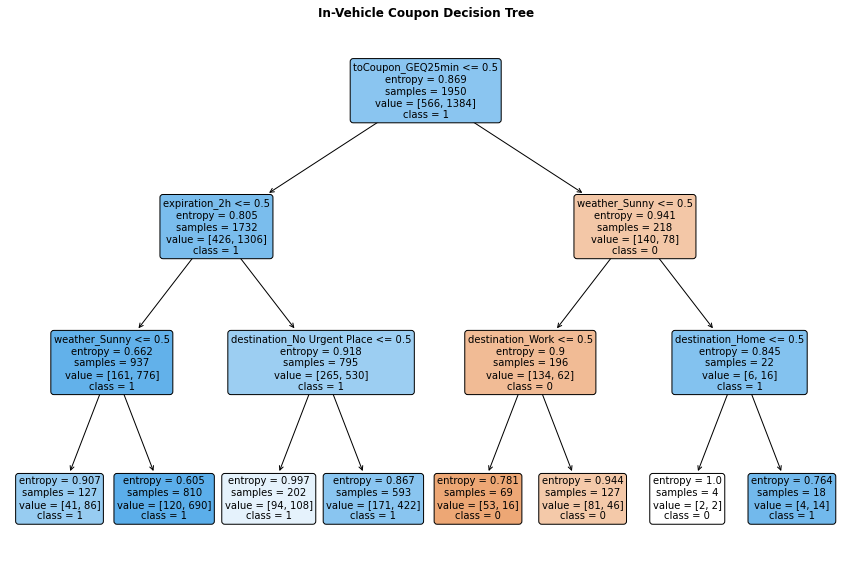

In [33]:
#Plot Decision Tree
decision_tree_fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(vcoupon_model, feature_names=feature_names, class_names=['0','1']
                   , rounded=True, filled=True, fontsize=10)
plt.title("In-Vehicle Coupon Decision Tree", fontsize=12, fontweight="bold")

In [34]:
#Results Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_pred = vcoupon_model.predict(X_test)

#Confusion Matrix
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

#F1-score
print('\nF1-score: ',f1_score(y_test, y_pred))
#max_depth=3: 85.6%
#max_depth=4: 85.6%
#max_depth=5: 85.6%

Confusion Matrix: 
 [[ 69 181]
 [ 13 573]]

F1-score:  0.8552238805970149


In [35]:
decision_tree_fig.savefig('decision_tree_figure.pdf')